To build the recommender system, we take the small (100K) rating dataset from the MovieLens site. This file consists of a number of .csv files as noted on the website. Of these files, we will only need to access the ratings.csv and movies.csv files.

In [1]:
#Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load movie ratings csv file as a pandas dataframe

ratings = pd.read_csv('ratings.csv')

In [3]:
# Display dimensions of movie ratings dataset

ratings.shape

(100836, 4)

As previously noted, this is the small set of rating, numbering approximately 100,000 which we have reconfirmed by verifying the shape of this dataframe.

In [4]:
# Display column names

ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Note the dataframe consists of 4 unique columns. This will be important once we load the second csv and verify its columns.

In [5]:
# Load movie info csv file as a pandas dataframe
info = pd.read_csv('movies.csv')

In [6]:
# Display dimension of movie info dataset
info.shape

(9742, 3)

In [7]:
# Display column names
info.columns

Index(['movieId', 'title', 'genres'], dtype='object')

As we can see, this csv contains addtional information regarding the movies themselves, a unique identifier (movieId), title, and genre information. This will provide us the requisite information needed to join these two datasets into a new dataframe.

In [8]:
# Merge the two datasets on 'movieId' column
movies = pd.merge(ratings, info, on= 'movieId')

# Display first 5 lines
movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


After combining the datasets into a singular dataframe, it was worth exploring the data to have a better understanding. To that end, we created a dataframe of mean ratings grouped by title and then added a column for rating counts.

In [9]:
# Create a dataframe grouping average rating by title
ratings= pd.DataFrame(movies.groupby('title')['rating'].mean())

# Create column in ratings dataframe to count number of ratings 
ratings['counts']= pd.DataFrame(movies.groupby('title')['rating'].count())

In [19]:
# Display first 5 lines of ratings dataframe
ratings.head()

,rating,counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


As we can see from just the first few lines, there are highly rated films with just one rating. It may be worthwhile then to examine the overall distribution of ratings within the set. To do so, we will need to create a histogram plotting the rating of the movies, which as seen below is mostly normally distributed with most ratings falling around 3-4. 

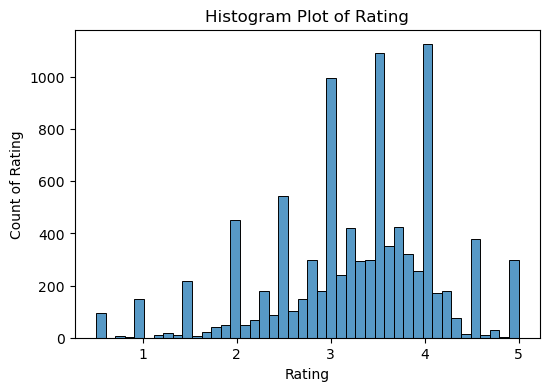

In [10]:
# Visualize the count of ratings
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(ratings['rating'])
plt.title("Histogram Plot of Rating")
plt.xlabel('Rating')
plt.ylabel('Count of Rating');

To compare similarities of movies to one another, we will need to create a matrix from our dataframe, where our movie titles become the columns and the userids become the rows. This way we can choose highly correlated films for our recommendation. The source method suggested 100 as the count threshold for number or ratings to ensure we were looking at popular movies and not outliers.  Though multiple values were tested to compare to the source cited, ultimately the value of count > 100 was deemed sound is the only one shown in the below code.

In [11]:
# Create matrix with movies as columns and userid as rows
movie_recs= movies.pivot_table(index='userId', columns='title',values='rating')
movie_recs.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Verify shape
movie_recs.shape

(610, 9719)

In [13]:
# Define variable for ratings for Happy Gilmore
happy_gilmore = movie_recs['Happy Gilmore (1996)']

In [14]:
import warnings
warnings.filterwarnings('ignore')
# Ccompute pairwise correlation between Happy Gilmore and other films
sim_happy = movie_recs.corrwith(happy_gilmore)

In [15]:
'''Create dataframe with correlation
Keeping only items with counts greater than 100
Films with highest correlation values listed first'''
corr_hgill = pd.DataFrame(sim_happy,columns=['Correlation'])
corr_hgill.dropna(inplace=True)
corr_hgill= corr_hgill.join(ratings['counts'])
corr_hgill[corr_hgill['counts']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,counts
title,,
American Pie (1999),0.657608,103
Speed (1994),0.604411,171
Twister (1996),0.550660,123
Dumb & Dumber (Dumb and Dumber) (1994),0.534040,133
"Green Mile, The (1999)",0.519470,111
Mission: Impossible (1996),0.465800,162
Austin Powers: The Spy Who Shagged Me (1999),0.464649,121
Ace Ventura: Pet Detective (1994),0.449809,161
Mrs. Doubtfire (1993),0.443796,144


In [16]:
# Create variable for Blade Runner (1982)

electric_sheep = movie_recs['Blade Runner (1982)'] 

In [17]:
# Ccompute pairwise correlation between Blade Runner and other films

sim_sheep = movie_recs.corrwith(electric_sheep)

In [18]:
# Create dataframe with correlation, keeping only items with counts greater than 100
corr_sheep = pd.DataFrame(sim_sheep,columns=['Correlation'])
corr_sheep.dropna(inplace=True)
corr_sheep= corr_sheep.join(ratings['counts'])
corr_sheep[corr_sheep['counts']>100].sort_values(by='Correlation',ascending=False).head(10)

,Correlation,counts
title,,
Blade Runner (1982),1.000000,124
Full Metal Jacket (1987),0.539540,102
"Terminator, The (1984)",0.532967,131
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.532582,120
Minority Report (2002),0.513656,120
Apocalypse Now (1979),0.500307,107
2001: A Space Odyssey (1968),0.473118,109
Trainspotting (1996),0.464132,102
Terminator 2: Judgment Day (1991),0.463667,224


As seen in the suggestions for both Happy Gilmore and Blade Runner, this method of recommendation is not perfect by any stretch. Someone who likes Comedy films might not like an action flick like Mission: Impossible, and clearly if someone likes Blade Runner, they're not looking to be recommended to watch it again. However, there are definitely options that look promising and within the same general genre of film. Ace Ventura for Happy Gilmore and The Terminator for Blade Runner for example. This suggests that there is some value and validity in this method.

**Resources**  
Code from this demonstration was adapted from:
Sisodia, R. (2021, December 11). Movie Recommendation System. *Medium.* Retrieved July 31, 2023, from https://medium.com/@rahulsisodia06/movie-recommendation-system-c8113226c0aa